### Загрузка и визуализация данных

Начнём с того, что ещё раз повторим отличие машинного обучения
от таких хайповых терминов, как: наука о данных (DataScience), интеллектуальный анализ данных (DataMining) и от стандартного программирования
(ClassicalProgramming).

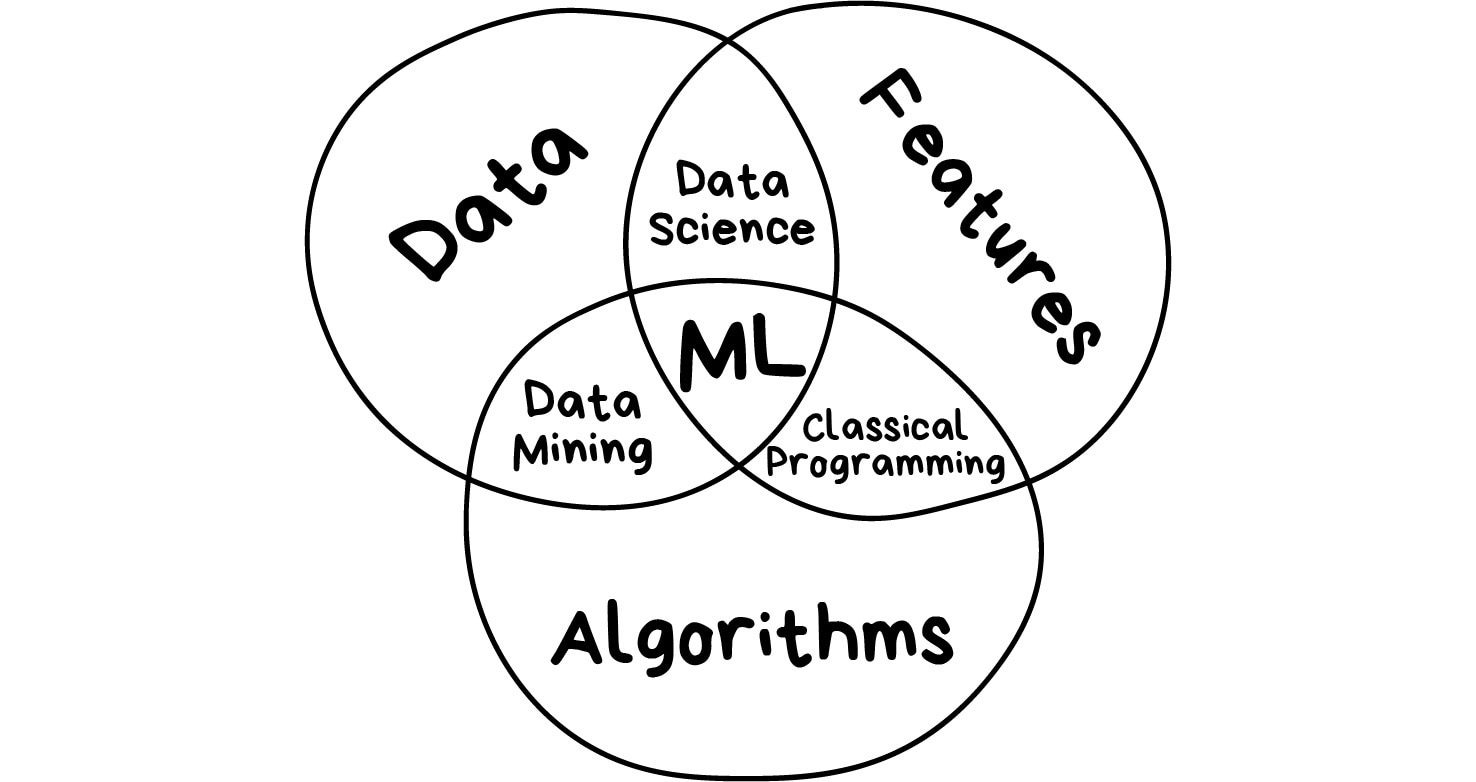

*источник https://vas3k.blog/blog/machine_learning/

**Машинное обучение** – это одно из направлений искусственного интеллекта. Основной принцип МО – обучение на заранее данном наборе данных.

Хорошее определение даёт англиязычная Википедия:

Machine learning (ML) is an umbrella term for solving problems for which development of algorithms by human programmers would be cost-prohibitive, and instead the problems are solved by helping machines "discover" their "own" algorithms, without needing to be explicitly told what to do by any human-developed algorithms.

Если что,

**Глубокое обучение** – это, так сказать, подмножество машинного обучения. Оно использует аппарат нейронных сетей, имитирующих человеческое
мышление и, как следствие, принятие решений, для решения реальных задач.

Соотношение выглядит примерно так:

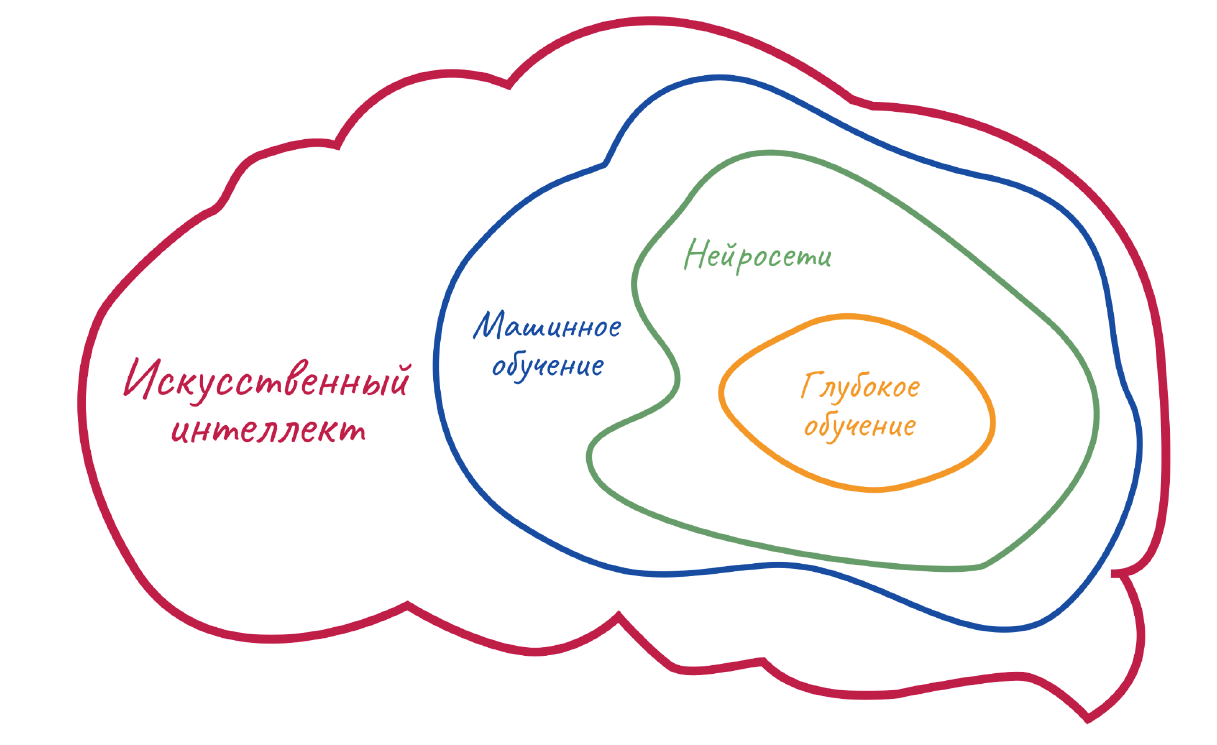

*источник https://droider.ru/post/iskusstvennyj-intellekt-mashinnoe-obuchenie-nejroseti-glubokoe-obuchenie-razbor-13-03-2022/

Карта мира машинного обучения

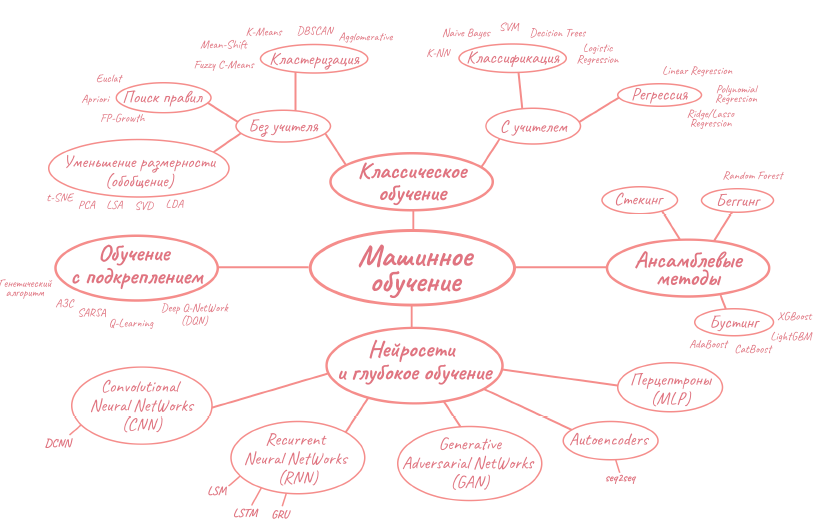

* источник материалы https://dc.itmo.ru/

# Используемые модули

#### Модуль numpy

Numerical Python. Библиотека numpy частично написана на языках С и «Фортран», благодаря чему и работает быстро.

In [127]:
# %pip install numpy
import numpy as np

Библиотека numpy работает с объектами-массивами, которые способны хранить много значений и быть многомерными. При этом, в отличие от списков, массивы могут хранить только значения одного типа. За счёт этого массивы в numpy занимают меньше памяти и работают быстрее, чем списки.

In [128]:
a = np.array([1, 2, 3, 4])
b = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
print(f"a[0] = {a[0]}")
print(f"b[0] = {b[0]}")

a[0] = 1
b[0] = [1 2]


!!! Встроенные в numpy типы данных аналогичны типам данных в языке программирования С.

Например, в предыдущем примере мы создали массив со значениями типа int32, то есть целые числа со знаком (отрицательные и положительные) и размером занимаемой памяти 32 бита.

In [129]:
a = np.array([1, 2, 3], dtype="uint8")
a[0] = 257
print(a)

[1 2 3]


C:\Users\Анна\AppData\Local\Temp\ipykernel_18188\2457519590.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 257 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  a[0] = 257


Для создания массива из нулей используется функция np.zeros(), которая принимает кортеж с количеством чисел, соответствующим количеству осей массива, а значения в кортеже — количество элементов по каждой из осей.

In [130]:
a = np.zeros((4, 3))
print(a)
print()
a = np.zeros((4, 3), dtype="int32")
print(a)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


Функция np.ones() создаёт массив аналогично функции np.zeros(), только из элементов-единиц.

In [131]:
import numpy as np

a = np.ones((4, 3))
print(a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Для создания массива, заполненного значениями из диапазона, используется функция np.arange().

In [132]:
a = np.arange(1, 10)
print(a)
print()
a = np.arange(1, 5, 0.4)
print(a)

[1 2 3 4 5 6 7 8 9]

[1.  1.4 1.8 2.2 2.6 3.  3.4 3.8 4.2 4.6]


Функция np.linspace() создаёт массив из заданного количества вещественных равномерно распределённых значений из указанного диапазона.

In [133]:
a = np.linspace(1, 5, 10)  # задаётся начало, конец диапазона и количество значений
print(a)

[1.         1.44444444 1.88888889 2.33333333 2.77777778 3.22222222
 3.66666667 4.11111111 4.55555556 5.        ]


In [134]:
a = np.array([9, 8, 7])
b = np.array([1, 2, 3])
print(a + b)
print(a - b)
print(a * b)
print(a / b)

[10 10 10]
[8 6 4]
[ 9 16 21]
[9.         4.         2.33333333]


In [135]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
b = np.array([[0, 0, 1],
              [0, 1, 0],
              [1, 0, 0]])
print(a @ b)

[[3 2 1]
 [6 5 4]
 [9 8 7]]


In [136]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
print(a.sum(axis=0))  # сумма чисел в каждом столбце
print(a.sum(axis=1))  # сумма чисел в каждой строке
print(a.min(axis=0))  # минимум по столбцам
print(a.max(axis=1))  # максимум по строкам

[12 15 18]
[ 6 15 24]
[1 2 3]
[3 6 9]


Покажем на примере различие в скорости работы массивов и списков. Посчитаем сумму квадратных корней первых $10^{7}$ чисел.

In [137]:
from time import time
t = time()
print(f"Результат итератора: {sum(x ** 0.5 for x in range(10 ** 7))}.")
print(f"{time() - t} с.")
t = time()
print(f"Результат numpy: {np.sqrt(np.arange(10 ** 7)).sum()}.")
print(f"{time() - t} с.")

Результат итератора: 21081849486.439312.
2.074131965637207 с.
Результат numpy: 21081849486.442448.
0.06992959976196289 с.


#### Модуль pandas

применяется для обработки и анализа табличных данных

In [138]:
# %pip install pandas
import pandas as pd

В библиотеке pandas определены два класса объектов для работы с данными:

*Series* — одномерный массив, который может хранить значения любого типа данных;

*DataFrame* — двумерный массив (таблица), в котором столбцами являются объекты класса Series.

In [139]:
#s = pd.Series(data, index=index) 
#data могут выступать: массив numpy, словарь, число
#Подробнее о numpy еа следующей практике, сейчас используем обычный список

s = pd.Series([1,2,3,4,5], index=["a", "b", "c", "d", "e"])
print(s)
d = {"a": 10, "b": 20, "c": 30, "g": 40}
print(pd.Series(d))
print()
print(pd.Series(d, index=["a", "b", "c", "d"]))
index = ["a", "b", "c"]
print(pd.Series(5, index=index))

a    1
b    2
c    3
d    4
e    5
dtype: int64
a    10
b    20
c    30
g    40
dtype: int64

a    10.0
b    20.0
c    30.0
d     NaN
dtype: float64
a    5
b    5
c    5
dtype: int64


Для Series доступно взятие элемента по индексу, срезы, поэлементные математические операции аналогично массивам numpy.

In [140]:
s = pd.Series([1, 2, 3, 4, 5], index=["a", "b", "c", "d", "e"])
print("Выбор одного элемента")
print(s["a"])
print("Выбор нескольких элементов")
print(s[["a", "d"]])
print("Срез")
print(s[1:])
print("Поэлементное сложение")
print(s + s)

Выбор одного элемента
1
Выбор нескольких элементов
a    1
d    4
dtype: int64
Срез
b    2
c    3
d    4
e    5
dtype: int64
Поэлементное сложение
a     2
b     4
c     6
d     8
e    10
dtype: int64


In [141]:
def length_stats(string):
    punk = '!?.,:;—'
    string = string.lower()
    for i in punk:
        string = string.replace(i, '')
    words = sorted(string.split())
    d = {k : len(k) for k in words}
    return pd.Series(d)

print(length_stats('Лес, опушка, странный домик. Лес, опушка и зверушка.'))


домик       5
зверушка    8
и           1
лес         3
опушка      6
странный    8
dtype: int64


Объект класса DataFrame работает с двумерными табличными данными. Создать DataFrame проще всего из словаря Python следующим образом:

In [142]:
students_marks_dict = {"student": ["Студент_1", "Студент_2", "Студент_3"],
                       "math": [5, 3, 4],
                       "physics": [4, 5, 5]}
students = pd.DataFrame(students_marks_dict)
print(students)
print(students.index)
print(students.columns)

     student  math  physics
0  Студент_1     5        4
1  Студент_2     3        5
2  Студент_3     4        5
RangeIndex(start=0, stop=3, step=1)
Index(['student', 'math', 'physics'], dtype='object')


In [143]:
students.index = ["A", "B", "C"]
print(students)

     student  math  physics
A  Студент_1     5        4
B  Студент_2     3        5
C  Студент_3     4        5


Для доступа к записям таблицы по строковой метке используется атрибут loc. При использовании строковой метки доступна операция среза:

In [144]:
print(students.loc["B":])

     student  math  physics
B  Студент_2     3        5
C  Студент_3     4        5


Обычно табличные данные хранятся в файлах. Такие наборы данных принято называть дата-сетами. Файлы с дата-сетом могут иметь различный формат. Pandas поддерживает операции чтения и записи для CSV, Excel 2007+, SQL, HTML, JSON, буфер обмена и др.

Несколько примеров, как получить дата-сет из файлов разных форматов:

- CSV. Используется функция **read_csv(file)**. Аргумент file является строкой, в которой записан путь до файла с дата-сетом. Для записи данных из DataFrame в CSV-файл используется метод **to_csv(file)**.

- Excel. Используется функция **read_excel(file)**. Для записи данных из DataFrame в Excel-файл используется метод **to_excel(file)**.
- JSON. Используется функция **read_json(file)**. Для записи данных из DataFrame в JSON используется метод **to_json(file)**.

Подробнее о модуле pandas - в официальной документации:

https://pandas.pydata.org/docs/user_guide/index.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

### Matplotlib

Картинка стоит 1000 слов!

Для визуализации данных pandas использует библиотеку matplotlib. 
Библиотека Matplotlib — это пакет для визуализации данных в Python. Pyplot — это модуль в пакете Matplotlib. Его вы часто будете видеть в коде как matplotlib.pyplot. Модуль помогает автоматически создавать оси, фигуры и другие компоненты, не задумываясь о том, как это происходит. Именно Pyplot используется в большинстве случаев.

Для её установки выполните в командной строке следующую команду:

In [145]:
# %pip install matplotlib
import matplotlib.pyplot as plt #very strongly followed convention

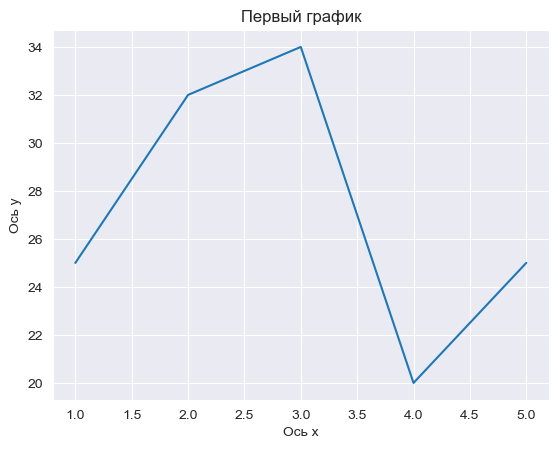

In [146]:
x = [1, 2, 3, 4, 5]
y = [25, 32, 34, 20, 25]

#  функция, которая строит график в соответствии со значениями, которые ей были переданы
plt.plot(x, y)

plt.xlabel('Ось x') #Подпись для оси х
plt.ylabel('Ось y') #Подпись для оси y
plt.title('Первый график') #Название

# функция, которая отвечает за вывод визуализированных данных на экран
plt.show()

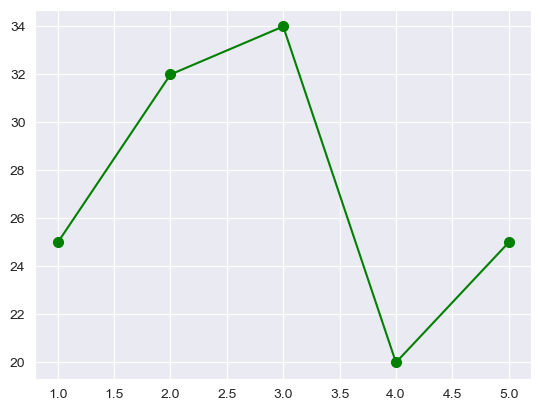

In [147]:
plt.plot(x, y, color='green', marker='o', markersize=7)

Более удобный в настройке вариант отрисовки графика - это создание отдельно с помощью объектов Figure и Axis.
Figure - это холст, на котором будет нарисован график.
Axis - это часть страницы, которая содержит данные.

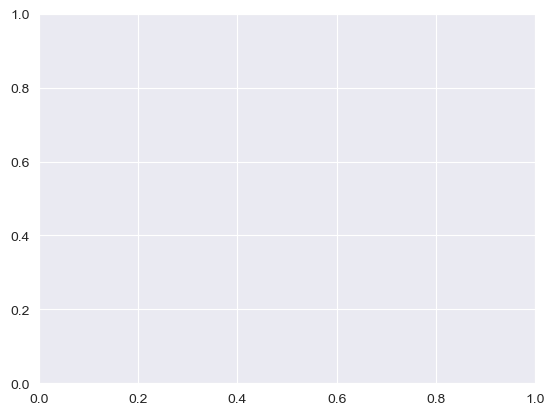

In [148]:
fig, ax = plt.subplots()
plt.show()

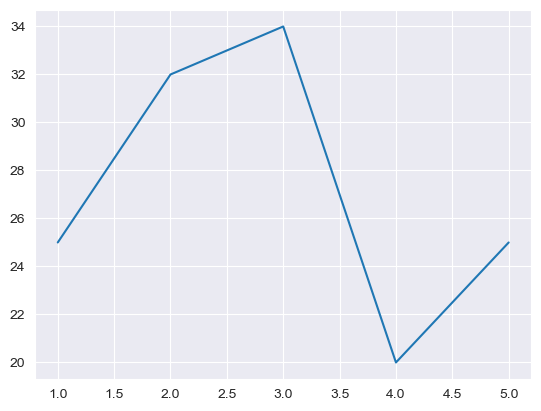

In [149]:
x = [1, 2, 3, 4, 5]
y = [25, 32, 34, 20, 25]
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

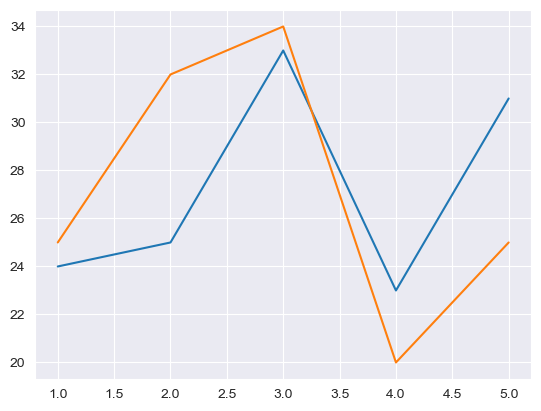

In [150]:
x = [1, 2, 3, 4, 5]
y1 = [24, 25, 33, 23, 31]
y2 = [25, 32, 34, 20, 25]
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
plt.show()

Подробнее о настройке графиков - в официальной документации:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

И ещё хороший тьюториал 
https://www.tidydata.ru/boxplot

### Seaborn

Помимо классического модуля matplotlib для визуализации можно использовать модуль seaborn.
- Seaborn разработан для того, чтобы упростить визуализацию данных.
- Он очень хорошо работает именно со структурами данных из Pandas.
- Он построен на базе matplotlib

In [151]:
#%conda install seaborn
import seaborn as sns #Samuel Norman Seaborn ("The West Wing" TV Show)
import matplotlib.pyplot as plt #нам всё ещё нужно импортировать matplotlib, seaborn - надстройка над ним

<Axes: >

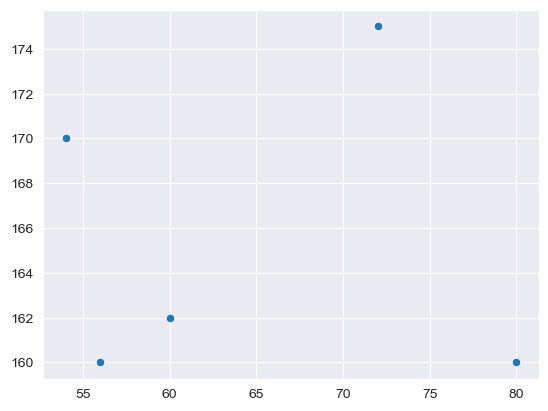

In [152]:
weight = [56, 60, 54, 72, 80]
height = [160, 162, 170, 175, 160]
#sns.set_style("darkgrid")
#sns.set_style("whitegrid")
sns.scatterplot(x=weight, y=height)

<Axes: >

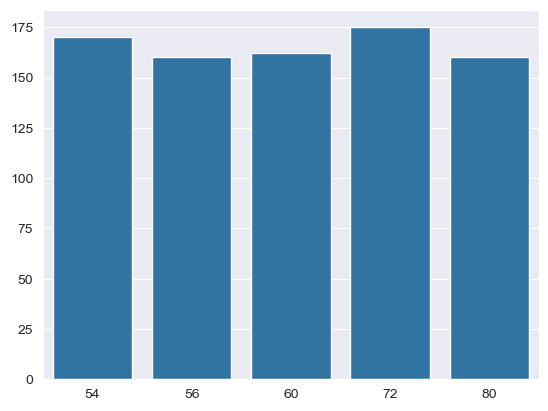

In [153]:
sns.set_style("darkgrid")
sns.barplot(x=weight, y=height)

<Axes: >

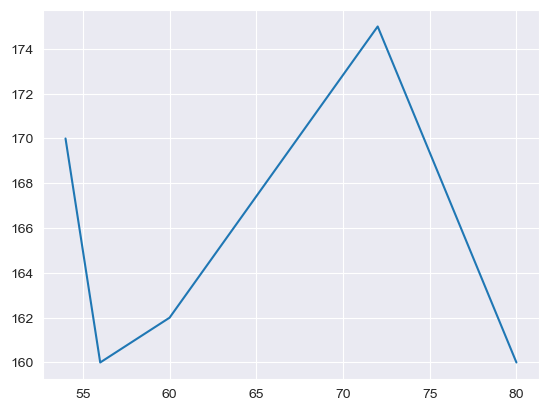

In [154]:
sns.lineplot(x=weight, y=height)

Более подробно прочитать о seaborn можно тут https://habr.com/ru/companies/otus/articles/540526/

или тут https://seaborn.pydata.org/

## Практика 1.1. Построение графиков данных (графики, гистограммы, BoxPlot диаграмы).

Данные возьмём с Kaggle 

Global Smoking Trend https://www.kaggle.com/datasets/mexwell/us-smoking-trend

Students Performance https://www.kaggle.com/datasets/joebeachcapital/students-performance

Global YouTube Statistics 2023 https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023

Self-reported life satisfaction https://ourworldindata.org/grapher/happiness-cantril-ladder?time=2016#research-and-writing

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# Выбираем рабочую директорию (один из вариантов)
import os
os.chdir(fr'C:\Users\Анна\Desktop\HSE courses\ML занятия\HSE ML\HSE ML\DataSets\my datasets\youtube')

**Читаем данные**

Данные можно взять отсюда (материалы Мыльникова Л.А.) https://disk.yandex.ru/d/ZKrrXqH5nrp2Gw

Данные можно взять отюда (материалы Проворовой А.А.) https://disk.yandex.ru/d/9kz3-a8PHJEYsQ

Данные можно скачать с kaggle.com или кучи других ресурсов (см. https://github.com/annaprovorova/HSE_ML_course_2024-2025/blob/main/%D0%98%D1%81%D1%82%D0%BE%D1%87%D0%BD%D0%B8%D0%BA%D0%B8%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.md)

In [157]:
# path = r"C:/Users/Анна/Desktop/ML занятия/HSE ML/HSE ML/DataSets/my datasets/youtube/"
# data_1 = pd.read_csv("DataSet1_1.csv", sep=";", encoding="UTF-8")
# data_2 = pd.read_csv("DataSet1_2.csv", sep="|", encoding="UTF-8")
# data_3 = pd.read_csv("DataSet1_3.csv", sep=",", encoding="UTF-8")
# data_4 = pd.read_csv("DataSet1_4.csv", sep=",", encoding="UTF-8")
df = pd.read_csv(f"Global YouTube Statistics.csv", sep=",", encoding='cp1251')#encoding="cp1251")

In [158]:
df.head(8)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,эээ Kids Diana Show,112000000,9.324704e+10,People & Blogs,эээ Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [160]:
df.tail()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
990,991,Natan por Aпї,12300000,9.029610e+09,Sports,Natan por Aпї,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501
994,995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,...,100000.0,2017.0,Aug,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [161]:
df[60:65]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
60,61,ABS-CBN Entertainment,44200000,5.029254e+10,People & Blogs,ABS-CBN Entertainment,193890,Philippines,PH,Entertainment,...,300000.0,2008.0,Jul,16.0,35.5,108116615.0,2.15,50975903.0,12.879721,121.774017
61,62,Alan Walker,43700000,1.288426e+10,Music,alanwalker,8,Thailand,TH,Film,...,NaN,2006.0,May,12.0,49.3,69625582.0,0.75,35294600.0,15.870032,100.992541
62,63,HolaSoyGerman.,43600000,4.831311e+09,Entertainment,holasoygerman. 2,6,NaN,NaN,People,...,NaN,2016.0,May,27.0,NaN,NaN,NaN,NaN,NaN,NaN
63,64,Shakira,43500000,2.756876e+10,People & Blogs,Shakira,326,Colombia,CO,Howto,...,500000.0,2005.0,Oct,16.0,55.3,50339443.0,9.71,40827302.0,4.570868,-74.297333
64,65,ээээээээ ээ ээээээээээээээ,43200000,3.645873e+10,Film & Animation,ээээээээ ээ ээээээээээээээ,1478,Russia,RU,Education,...,300000.0,2011.0,May,31.0,81.9,144373535.0,4.59,107683889.0,61.524010,105.318756


In [162]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [163]:
#тут вообще-то есть плохие символы (это значки и русские буквы в данном случае)
#df['Youtuber'] = df['Youtuber'].str.replace('ý', '', regex=True)

In [164]:
df[df['created_year'] > 2010.0]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,эээ Kids Diana Show,112000000,9.324704e+10,People & Blogs,эээ Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99,United States,US,Entertainment,...,100000.0,2012.0,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
990,991,Natan por Aпї,12300000,9.029610e+09,Sports,Natan por Aпї,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [165]:
df[['Youtuber','Country', 'subscribers', 'created_year', 'created_month']].sort_values(['created_year', 'created_month'], ascending=False)

,Youtuber,Country,subscribers,created_year,created_month
548,Salman Noman,NaN,16700000,2022.0,May
957,Bebefinn - Nursery Rhymes & Kids Songs,United States,12500000,2022.0,Mar
852,Vibhu 96,India,13400000,2022.0,Jun
886,Ryan Trahan,United States,13100000,2022.0,Jun
969,Quantum Tech HD,Pakistan,12500000,2022.0,Apr
...,...,...,...,...,...
236,Chris Brown,NaN,25200000,NaN,NaN
468,Good Mythical Morning,NaN,18300000,NaN,NaN
508,The Game Theorists,Australia,17600000,NaN,NaN
735,LEGENDA FUNK,Brazil,14500000,NaN,NaN


In [166]:
df.groupby(df['Country'])['Country'].count().sort_values(ascending=False)

Country
United States           313
India                   168
Brazil                   62
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Saudi Arabia              9
Australia                 9
Ukraine                   8
United Arab Emirates      7
Pakistan                  6
Germany                   6
France                    5
Japan                     5
Sweden                    4
Turkey                    4
Netherlands               3
Vietnam                   3
Jordan                    3
Chile                     3
Singapore                 3
Italy                     2
Iraq                      2
Egypt                     2
Ecuador                   2
Switzerland               1
Venezuela                 1
Afghanistan 

## Строим графики

### barplot

C:\Users\Анна\AppData\Local\Temp\ipykernel_18188\1071881383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df.head(10),
C:\Users\Анна\AppData\Local\Temp\ipykernel_18188\1071881383.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(l/1e6)}M' for l in ax.get_yticks()])


Text(0.5, 1.0, 'Top 10 Youtubers by Subscribers')

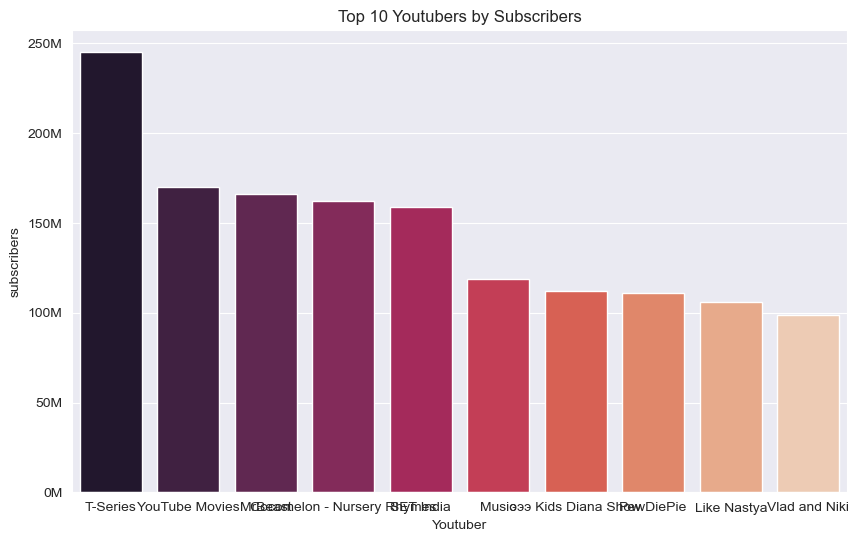

In [167]:
sns.set_style('darkgrid')#https://seaborn.pydata.org/generated/seaborn.set_style.html?highlight=set_style
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df.head(10), 
                 y='subscribers', 
                 x='Youtuber', 
                 palette='rocket')#https://seaborn.pydata.org/tutorial/color_palettes.html
ax.set_yticklabels([f'{int(l/1e6)}M' for l in ax.get_yticks()])
#plt.xticks(rotation=60)
plt.title('Top 10 Youtubers by Subscribers')

### Scatterplot

C:\Users\Анна\AppData\Local\Temp\ipykernel_18188\3901210867.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,


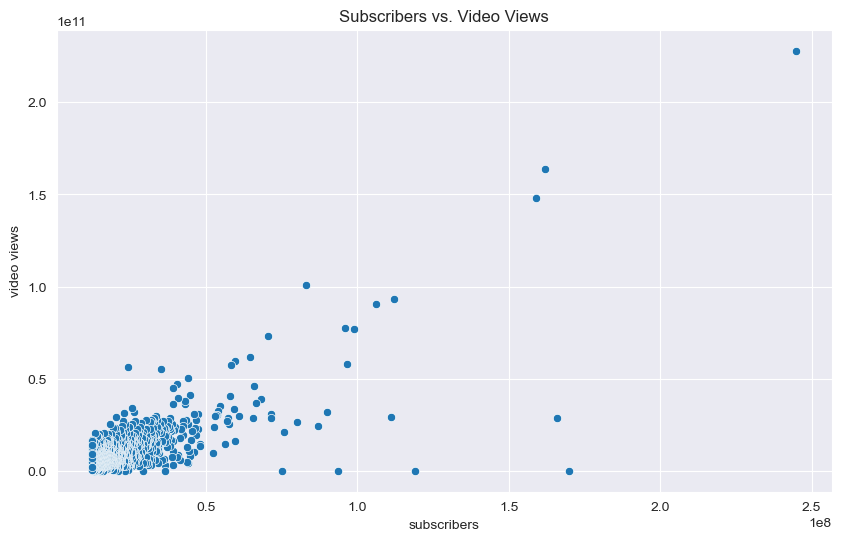

In [168]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x ='subscribers', 
                y='video views', 
                palette='rocket').set(title='Subscribers vs. Video Views')
plt.show()

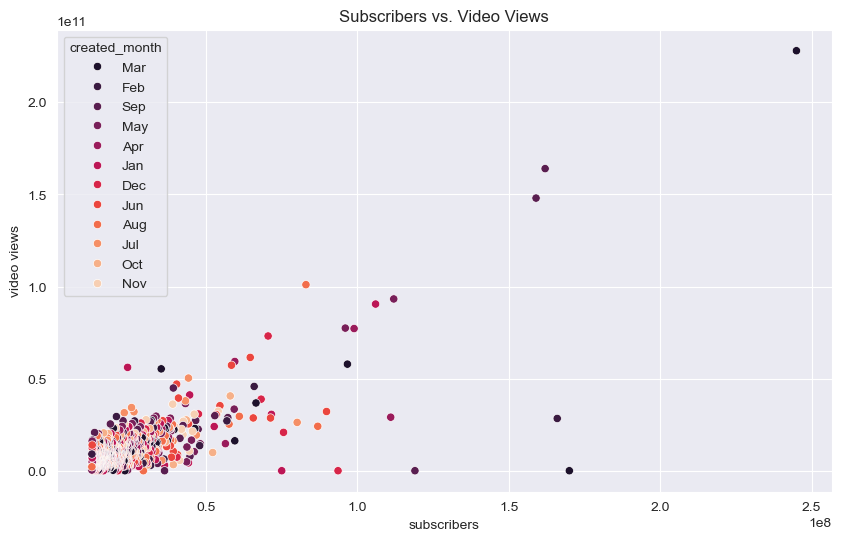

In [169]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x ='subscribers', 
                y='video views', 
                hue='created_month', 
                palette='rocket').set(title='Subscribers vs. Video Views')
plt.show()

### Lineplot

In [172]:
#Попробуем посчитать количество подписчиков в зависимости от года создания канала
#есть проблема: в колонке created year есть NA
#Вообще, умный pandas умеет их просто игнорировать, но для чистоты данных, надо бы от них избавиться
df = df.dropna()

df['created_year'] = df['created_year'].astype(int)
yearly_subscribers = df.groupby(['created_year', 'subscribers'])['subscribers'].mean()

type(yearly_subscribers)
# yearly_subscribers = pd.DataFrame(yearly_subscribers)

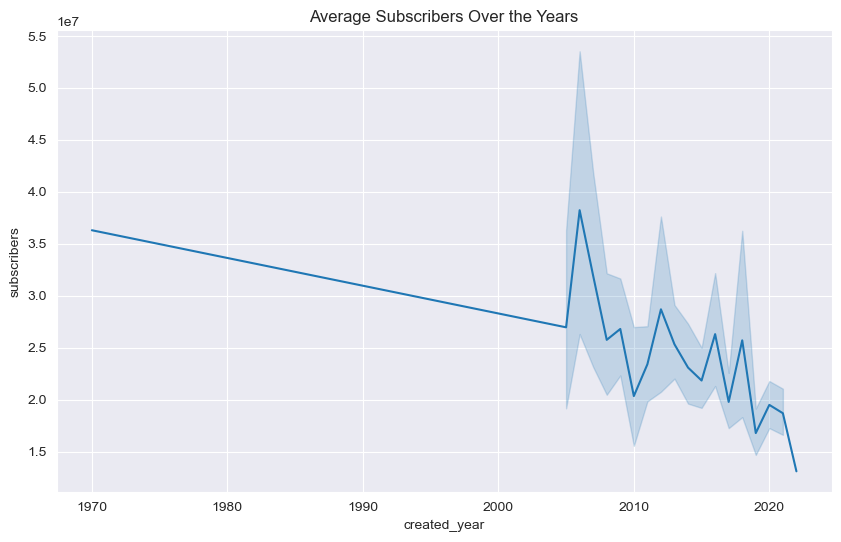

In [173]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_subscribers, 
             x='created_year', 
             y='subscribers').set(title='Average Subscribers Over the Years')
plt.show()
#the mean and 95% confidence interval
#ci=None

C:\Users\Анна\AppData\Local\Temp\ipykernel_18188\1571833389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=df,


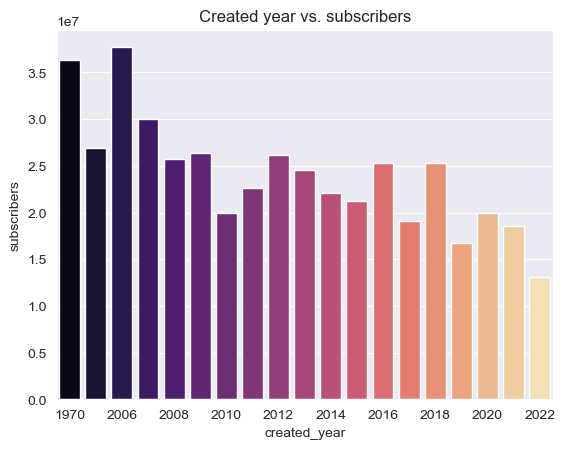

In [174]:
df.sort_values(by='created_year',inplace=True)

#sns.set(font_scale=0.7) 

plot = sns.barplot(data=df, 
                    x='created_year', 
                    y='subscribers',
                    palette='magma',
                    errorbar=None)
#errorbar=None  - если захотим выключить стандартную ошибку
plot.set(title='Created year vs. subscribers')


#ещё вариант, чтобы не смешивали между собой подписи
for ind, label in enumerate(plot.get_xticklabels()):
    if ind%2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.show()

### Pie plot

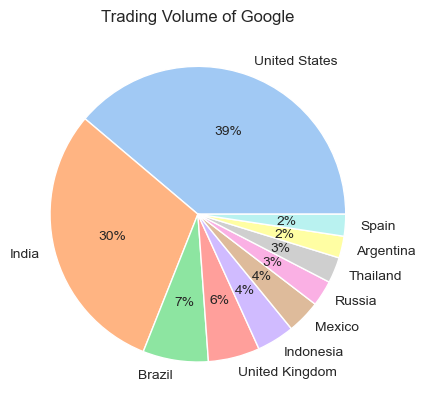

In [175]:
#Топ 10 стран
countries = df.groupby(df['Country'])['Country'].count().sort_values(ascending=False)[:10]
labels = countries.index
colors = sns.color_palette('pastel')
plt.pie(countries, labels=labels, colors=colors, autopct='%.0f%%')
plt.title("Trading Volume of Google")
plt.show()

### Несколько графиков

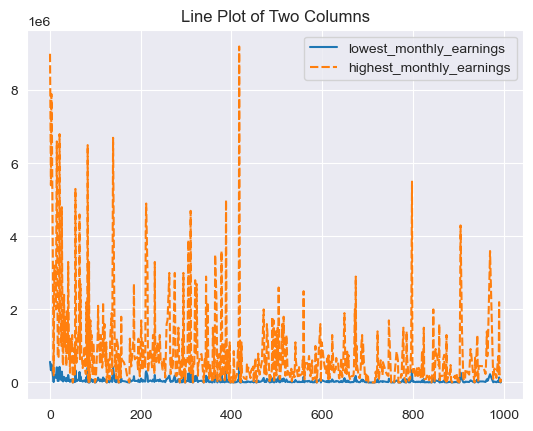

In [176]:
sns.lineplot(data=df[['lowest_monthly_earnings','highest_monthly_earnings']])

plt.title('Line Plot of Two Columns')

plt.show()

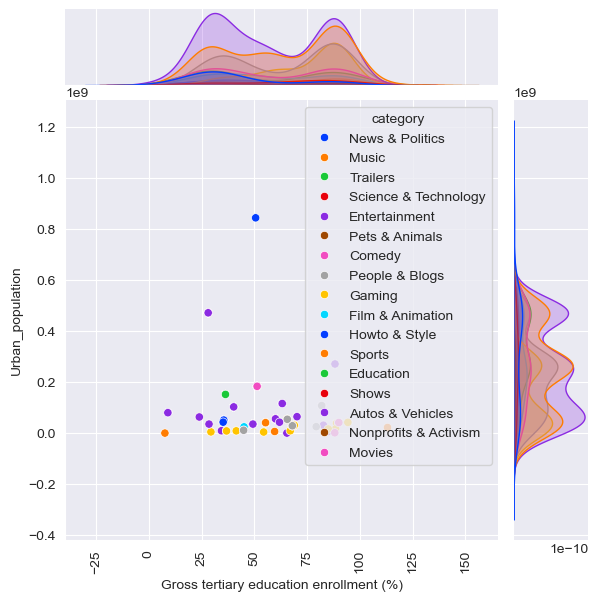

In [177]:
sns.jointplot(
    x='Gross tertiary education enrollment (%)', 
    y='Urban_population', 
    data=df,
    hue='category',
    palette='bright')
plt.xticks(rotation=90)
plt.show()

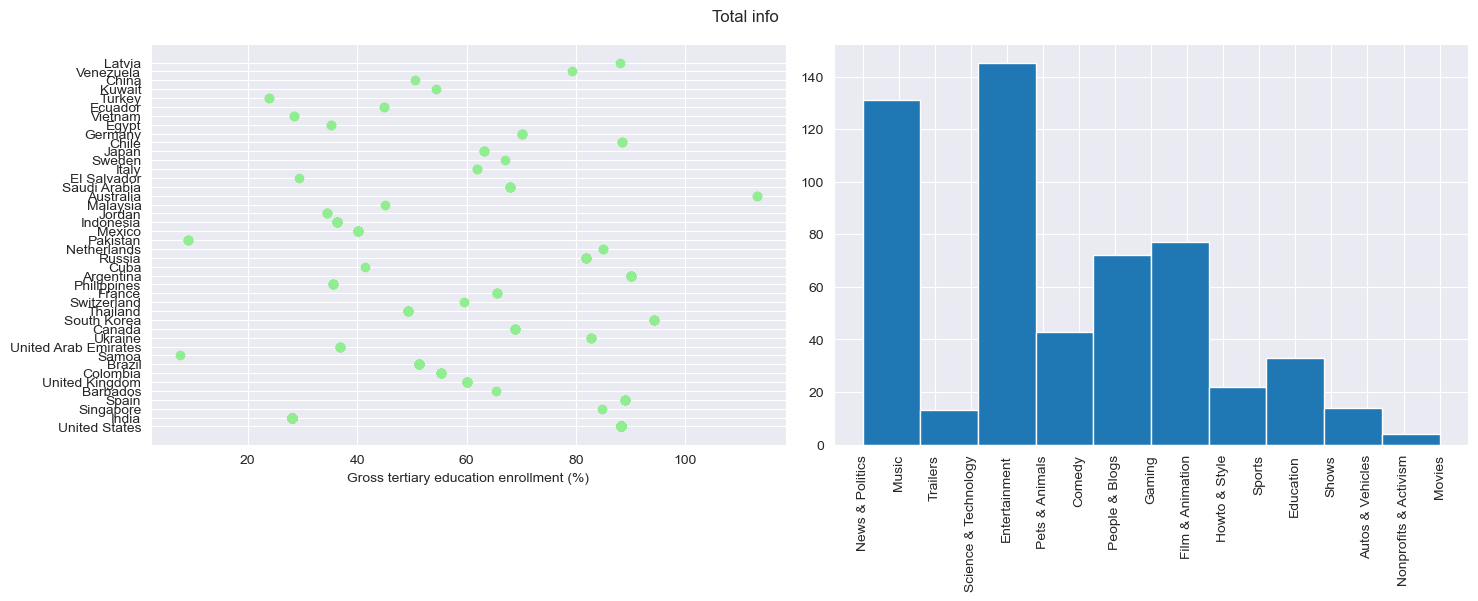

In [178]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns of subplots

axs[0].scatter(df['Gross tertiary education enrollment (%)'], df['Country'],color='lightgreen')
axs[0].set_xlabel('Gross tertiary education enrollment (%)')

axs[1].hist(df['category'])


fig.suptitle('Total info')
plt.tight_layout()
plt.xticks(rotation=90)
# Show the plots
plt.show()

### Correlation heatmap


<Axes: >

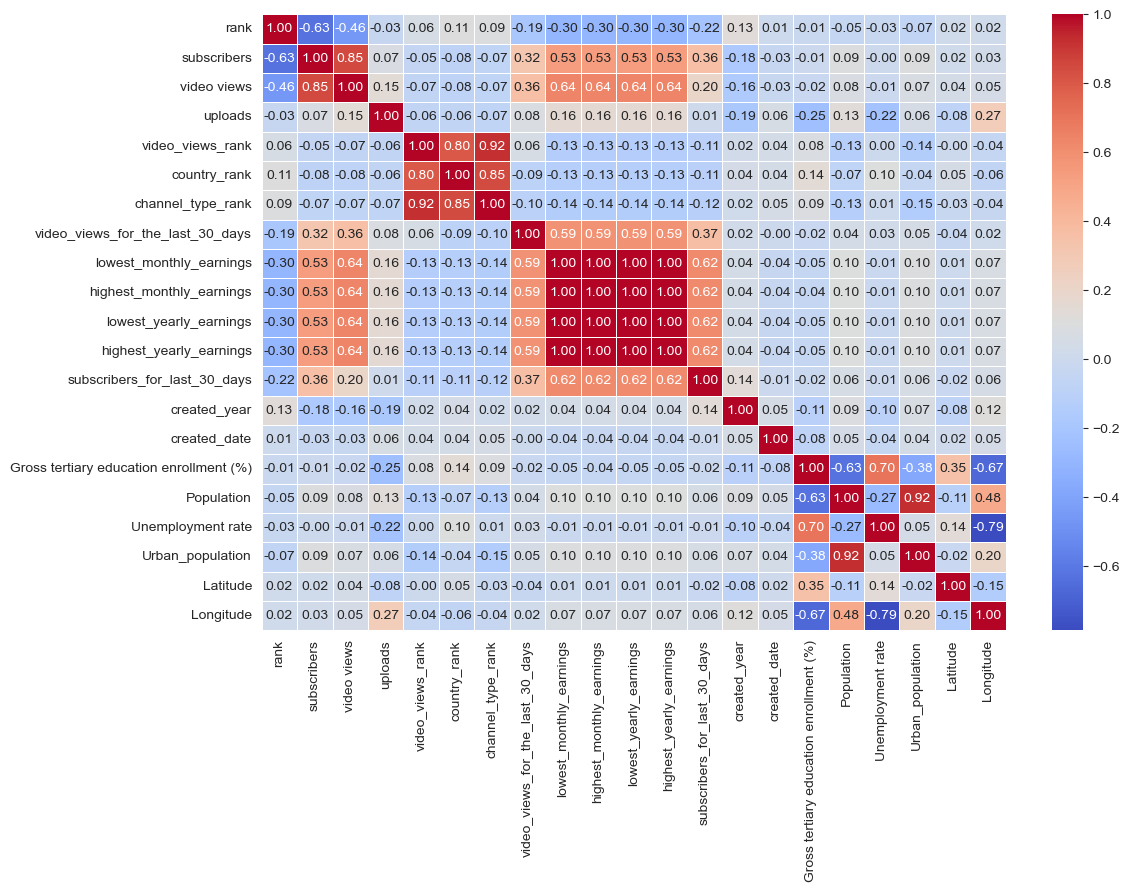

In [179]:
#бывают весьма сложные графики, например, корреляционые карты
#Но для этого нужно сначала выделить исключительно числовые признаки
import numpy as np

categorical_features=[feature for feature in df.columns if df[feature].dtype=='object']
numerical_features=[feature for feature in df.columns if feature not in categorical_features]
df_num=df[numerical_features]
df_cat=df[categorical_features]

plt.figure(figsize=(12,8))
corr=df_num.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True, fmt=".2f", linewidths=0.5) #annot_kws={'size':10}

In [180]:
#есть смысл почистить данные
dropped_features = [
     'created_date', 'Latitude', 'Longitude'
]
data = df_num.drop(df[dropped_features], axis=1)
data = data.dropna()


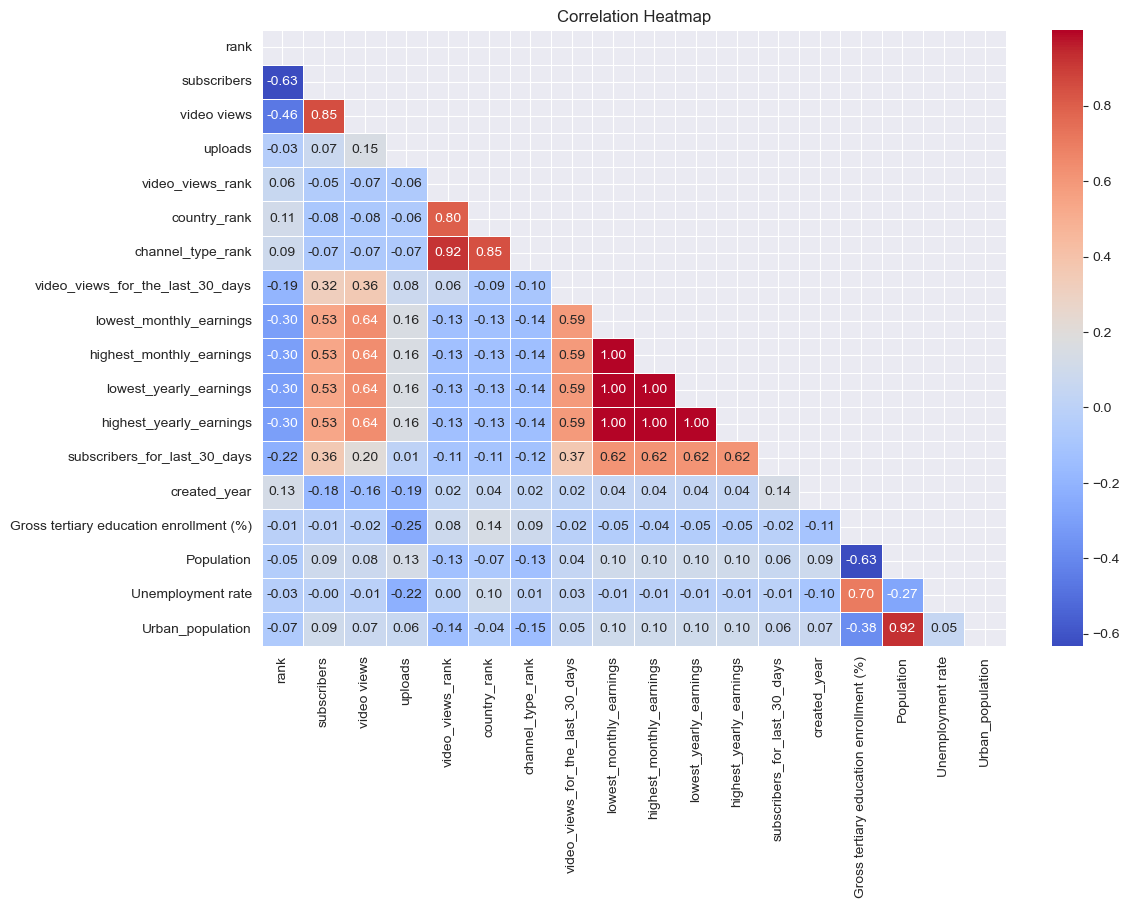

In [181]:
corr = data.corr()
plt.figure(figsize=(12, 8))
msk = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=msk)
plt.title('Correlation Heatmap')
plt.show()

##### Диаграммы размаха 
(«ящик с усами») (Box and Whisker Plot или Box Plot) – это удобный способ визуального представления групп числовых данных через квартили.

Прямые линии, исходящие из ящика, называются «усами» и используются для обозначения степени разброса (дисперсии) за пределами верхнего и нижнего квартилей. Выбросы иногда отображаются в виде отдельных точек, находящихся на одной линии с усами. Диаграммы размаха могут располагаться как горизонтально, так и вертикально.

Диаграммы размаха, как правило, используются в описательной статистике и позволяют быстро исследовать один или более наборов данных в графическом виде. Несмотря на то, что в сравнении с гистограммой или графиком плотности, этот график может показаться примитивным, его преимущество – в экономии пространства, что особенно удобно при сравнении распределений между большим количеством групп или наборов данных.

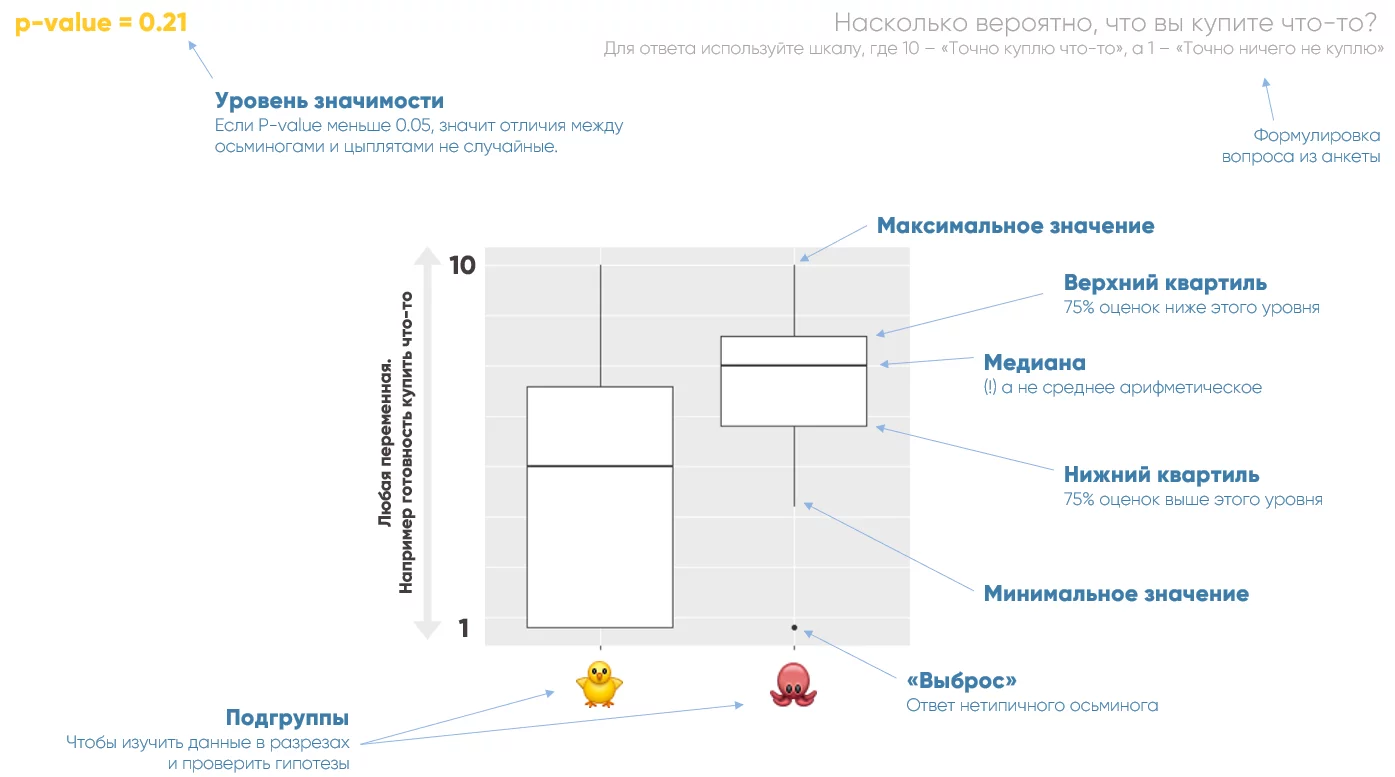

*источник https://www.tidydata.ru/boxplot

Виды наблюдений, которые можно сделать на основе ящика с усами:

- Каковы ключевые значения, например: средний показатель, медиана 25го перцентиля и так далее.

- Существуют ли выбросы и каковы их значения.

- Симметричны ли данные.

- Насколько плотно сгруппированы данные.

- Смещены ли данные и, если да, то в каком направлении.

**Медиана** – это «средний элемент», то есть буквально в середине массива (если его упорядочить). Чтобы ее найти:

1.Упорядочим массив

2. Если длина массива нечетная, берем элемент посередине

3. Если длина массива четная, берем два элемента посередине и считаем их среднее арифметическое

X - это N-й **перцентиль**, если N% элементов массива <= X

*Большие массивы чисел сами по себе «в лоб» не понятно как вообще можно визуализировать, поэтому в метриках и используются перцентили*

**Квартиль** это четверти: 25%, 50%, 75%, 100%. То есть бывает первый, второй третий и четвертый квартиль. И еще иногда используют нулевой.

**Квантиль** - это, условно, перцентиль без процентов. Используется в статистике, где бывает удобно указывать абсолютную вероятность, а не в процентах

Еще можно встретить **дециль** — это 10%, 20% и т.д.

C:\Users\Анна\AppData\Local\Temp\ipykernel_18188\115967543.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='subscribers', data=df, palette='Set2')


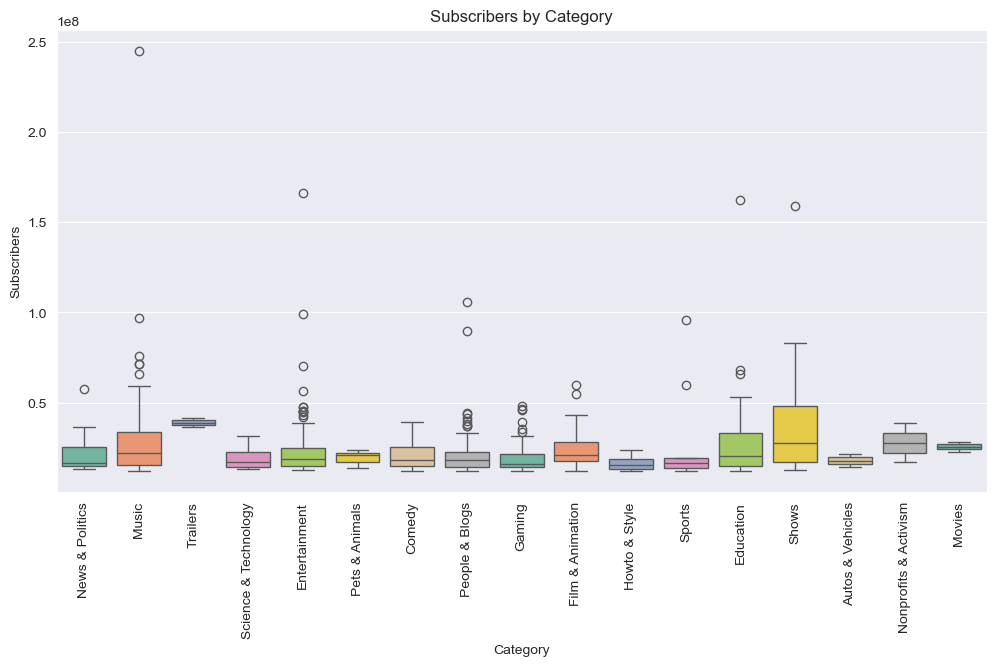

In [182]:
#Бокс-плот
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='subscribers', data=df, palette='Set2')
plt.xlabel('Category')
plt.ylabel('Subscribers')
plt.title('Subscribers by Category')
plt.xticks(rotation=90)
plt.show()

Скрипичный график используется для визуализации распределения данных и их плотности вероятности.

**Скрипичный график** – это сочетание диаграммы размаха и графика плотности, развернутых и расположенных по обе стороны для отображения формы распределения данных. Толстая черная полоса в центре представляет межквартильный диапазон, исходящая из нее тонкая черная линия представляет доверительные интервалы с 95%-ной вероятностью, а белая точка – это медиана.

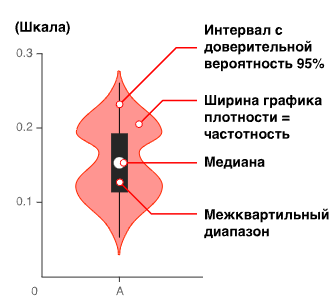

C:\Users\Анна\AppData\Local\Temp\ipykernel_18188\311178093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='subscribers', data=df, palette='magma')


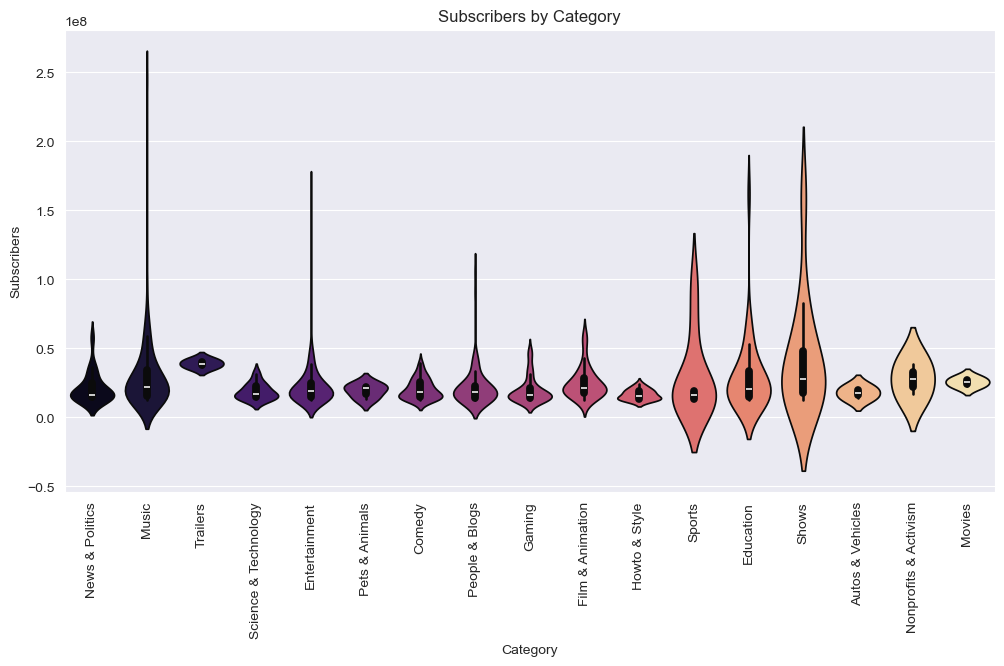

In [183]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='subscribers', data=df, palette='magma')
plt.xlabel('Category')
plt.ylabel('Subscribers')
plt.title('Subscribers by Category')
plt.xticks(rotation=90)
plt.show()

### Дополнительные баллы

Напомню, что просто повторить всё то, что показано в практике с уже предоставленными датасетами - это 8 из 10 баллов. 

Если Вы действительно хотите получить 9 или 10 баллов, нужно выполнить ещё и эти задания:

1) Свой файл данных; 

2) Качественный анализ данных (описание. Прямо словами написать) 

3) Использование дополнительных способов визуализации (Другие графики, кроме тех, что представлены в лабораторной)

### Дополнительное задание к практике от АА: 

пройти курс по визуализации данных https://www.kaggle.com/learn/data-visualization

**Бонус для любознательных:**

почитайте учебник по машинному обучению от ШАД Яндекса https://academy.yandex.ru/handbook/ml/

**Бонус для души**

Если Вы любите рисунки от руки, умеете понимать очень длинные математические шутки и в целом, дочитали этот материал до конца, то, возможно, вам понравится модуль xkcd (A Python interface to xkcd.com)

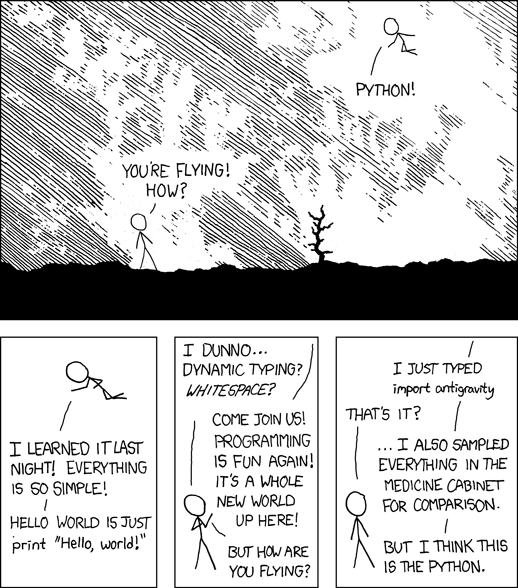

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

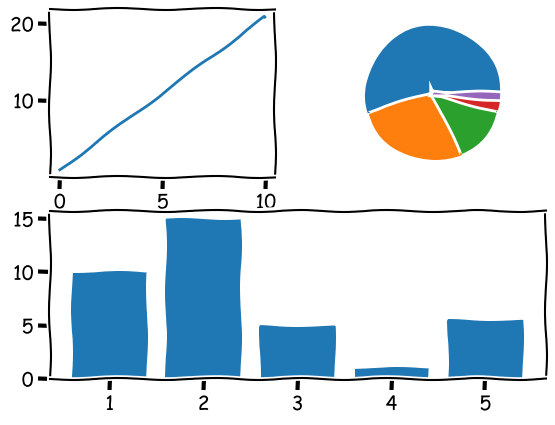

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.xkcd() #это единственное отличие, от обычного использования plt

# Первый график
plt.subplot(2, 2, 1)

x1 = np.arange(0, 10, 0.05)
y1 = 2 * x1 + 1
plt.plot(x1, y1)

# Второй график
plt.subplot(2, 2, 2)
# Данные для построения графика
data = [20.0, 10.0, 5.0, 1.0, 0.5]

# Нарисовать круговой график
plt.pie(data)

# Нарисовать третий график
plt.subplot(2, 1, 2)
xbar = [1, 2, 3, 4, 5]
hbar = [10.0, 15.0, 5.0, 1.0, 5.5]
plt.bar(xbar, hbar)

plt.show()